# Injectable Estrogens

*Characterizing Estradiol Esther Depot Effects*

I'm a sensitive flower and I can't deal with the wild ride of extremly fluctuating peaks and troughs. I need stable levels, so I've been experimenting with smaller, more frequent doses. I'm getting on to Estradiol Cypionate, which due to its long release profile and long tail, has a significant depot effect (compared to Estradiol Valerate). The actual function over time is complicated and depends on many entangled parameters. I got sick of the ridiculous hand waving, mysticism, dogma, and guesswork around achieving particular levels (none of which belong in western medical approaches), so I put together a super rough simulation of ongoing, periodic estradiol injections to visualize the depot effect as well as to get a sense for how long it takes to reach a steady state, what kind of levels you can achieve with smaller doses, and how stable levels will be.


## Surprising Findings

* In steady state, the peak is shifted in time relative to a single injection. Looking at the Cypionate curve, the peak always shifts to about 2/3 of the way between injections at steady state, even though the peak of a single EC injection is around 3-4 days. This means that the subjective experience of the peak always comes between injections. Perhaps it's possible to somatically feel the release of a single depot, or an uneven blood concentration throuhgout your body, but the overall blood concentration levels don't work like that. You can't just take the concentration curve for a single injection and apply it linearly to steady state dynamics.
* With Estradiol Valerate, the trough blood concentration is not necessarily at the moment of injecton. I think this might be bad data, unless the release curve for EV truly has a very flat slope at the beginning. But for very frequent injections, the pre-injection value can actually be before the peak of the previous injection, and the actual trough can happen between injections, instead of just before the next one.
    * Hmm, yeah, I think my curve data is bad and that needs to be my next project with this. https://en.wikipedia.org/wiki/Estradiol_valerate#/media/File:Estradiol_and_dehydroepiandrosterone_levels_after_a_single_intramuscular_injection_of_Gynodian_Depot_in_women.png


## Data & Interpretations

For estradiol cypionate I'm working with the [data from this chart](https://en.wikipedia.org/wiki/Template:Hormone_levels_with_estradiol_cypionate_by_intramuscular_injection#/media/File:Estradiol_levels_after_a_single_intramuscular_injection_of_1.0_to_1.5-mg_estradiol_cypionate_in_hypogonadal_girls.png) (for a 1.0mg injection, with an extrapolated tail trailing off to zero) as my base curve for a single, isolated injection. Then, for a number of different injection periods (every other day, every three days, every week, etc), I simulate ongoing injections at this dose by additively and cumulatively overlaying the curve for each injection at the proper time.

In one chart I extrapolate the decay of the function as reaching 0 at 37 days, and in the other chart I extrapolate it as reaching 0 at 27 days. At $T \rightarrow \infty$, the specifics of the decay of the long tail of this medication becomes significant, even if it's only a few pg/mL contributed per depot. Between 37 and 27 day curves, steady-state levels can differ up to 50pg/mL. I'd like to find an actual data source for this decay–these are very rough estimations.

You can see how it takes around 4-6 weeks (depending heavily on the decay factors) to reach a steady state, and how low dose and frequent injections can give extremely stable and sufficient levels. With EC, the gentle curve allows for even less frequent injections to have relatively stable levels compared to Estradiol Valerate. The depot effect is strong: a single injection peaks around 65pg/mL, but injecting that every 3rd day leads to steady state levels around 275pg/mL!

At least at the 5mg dose I have data for, which is a common dose, Estradiol Valerate is a complete shit show as far as stable levels and I honestly don't know how I survived it for a year and a half! I use [this chart](https://en.wikipedia.org/wiki/Template:Hormone_levels_with_estradiol_valerate_by_intramuscular_injection#/media/File:Estradiol_levels_after_a_single_5_mg_intramuscular_injection_of_estradiol_esters.png) to compare EC and EV at 5mg doses. Both are able to reach very similar average steady state levels with equivalent injection periods. At the 2 day period, EC and EV are well matched for levels and stability, EV at 1150pg/mL and EC at 1050pg/mL, and both fluctuating by around 100pg/mL between peak and trough. At all periods greater than 2 days (ie every third day, or injecting twice a week, or once a week, or longer), however, Estradiol Valerate fails badly and sees fluctuations of at least 300pg/mL between peak and trough, and only getting more extreme for less frequent doses. Estradiol Cypionate is able to maintain stable levels all the way to a 7 day period before it starts seeing greater fluctuations.

Compared to the 1mg EC dose, there is more fluctuation between peak and trough with the 5mg dose (seems to be around a 100pg/mL spread).


## Implications

My intuition is to analyze this from a control theory perspective. I think it's plausible to develop a simple algorithm to give trans folx a solid dosing regimen that is tuned to their needs. Blood testing is still required, but we can take some of the shot-in-the-dark guesswork out of getting onto hormones.

It may not be desirable for the wellbeing of our bodies, but there's a possibility to more quickly reach steady state levels utilizing concepts from control theory. If you look at E levels like a PID controller, injecting only small levels and letting them slowly ramp up to steady state is very slow. We could tune the curve by adding a P-Proportional term with a small number of initial doses calibrated so that their peak will match the desired target dose, and then for the succeeding doses drop down to the steady state dose.

I believe that Estradiol Valerate is poorly suited for transgender women who need stable levels of estradiol to function well.

Frequent small doses of Estradiol Cypionate has implications for measureing blood levels, as well. When the spread between peak and trough levels is <10 pg/mL, and the precision of most blood test techniques is no better than +-10 pg/mL, the need to measure at trough (immediately before the next injection) in order to have accurate results is relaxed. This is another way in which we can take some of the mad guessing in the dark blindness out of trans hormone therapy.


## How This Can Be Useful

One useful way to use this is to:

1. pick a period curve that looks and feels good to you, your life, and your sensitivity to fluctuating levels (whether that's every third day, once a week, whatever).
2. find the mean steady-state value reached by that curve. just eyeball it. ex: for every fifth day, EC @ 1.0mg lands you around 180pg/mL levels.
3. to determine the dose you need in order to reach a particular target level using that injection period, calculate:
  * **dose = 1.0mg * (level pg/mL) / (steady-state pg/mL)**
4. for this example, if you wanted to reach 350pg/mL, you would need to inject 1.94mg every 5 days:
  * dose = 1.0mg * (350 pg/mL) / (180 pg/mL)
  * **dose = 1.94mg**

Using your own steady-state blood work you can calibrate these curves and use them to predict where your levels will end up if you want to change your injection dose or frequency.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.misc import derivative

%matplotlib inline
from matplotlib import pyplot as plt

from injectio import pharma, injectables

## Injection Curves

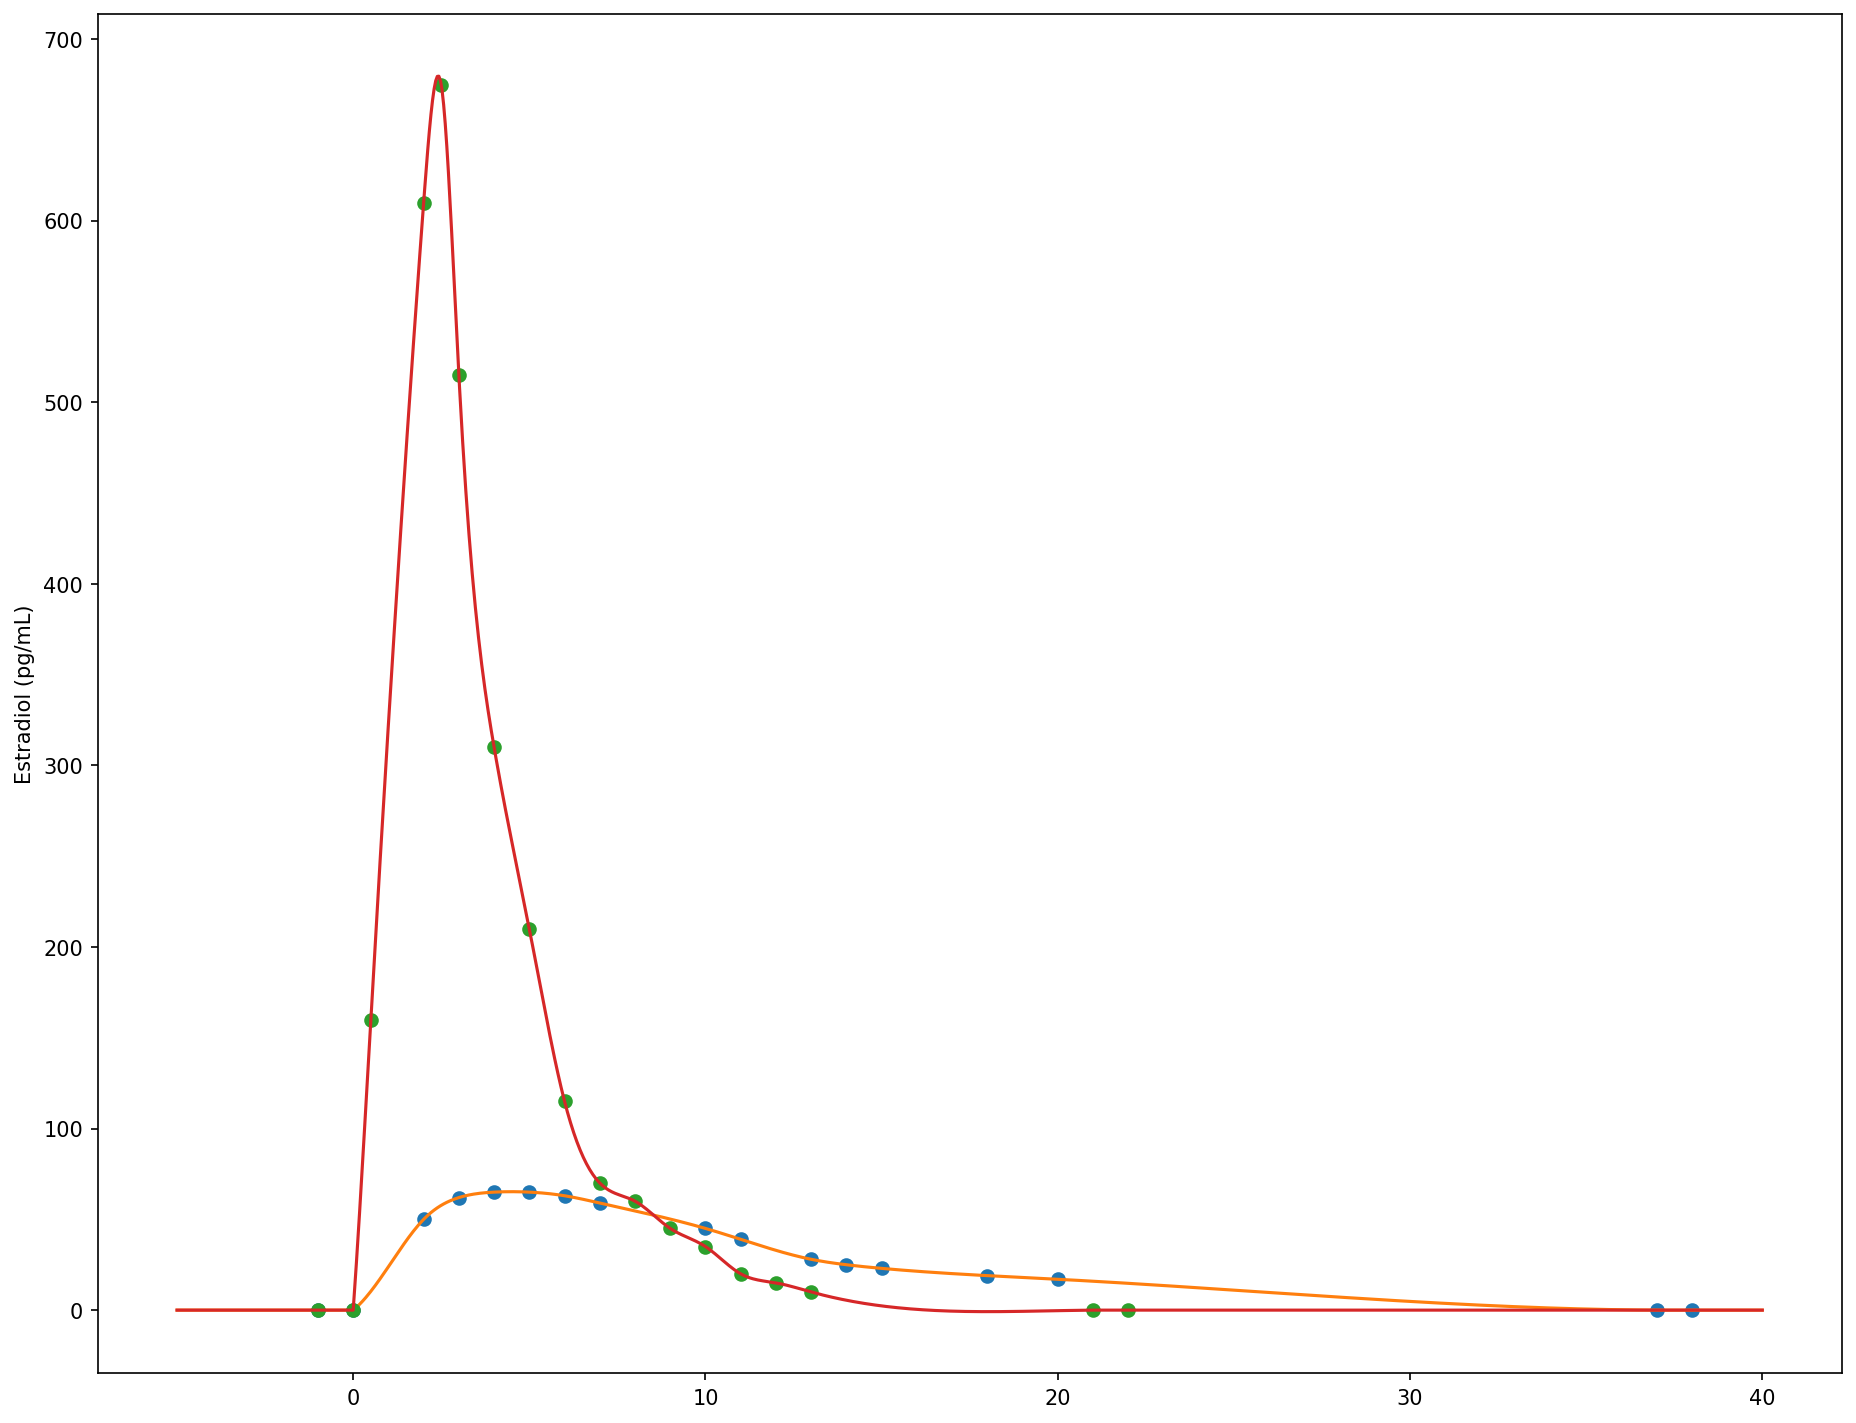

In [6]:
pharma.startPlot()
target_x = np.linspace(-5.0, 40.0, num=1000)
ec_1mg_y = np.array([injectables.ef_ec_1mg(T) for T in target_x])
ev_5mg_y = np.array([injectables.ef_ev_5mg(T) for T in target_x])

plt.plot(injectables.ec_level_1mg[:,0], injectables.ec_level_1mg[:,1], 'o')
plt.plot(target_x, ec_1mg_y)

plt.plot(injectables.ev_level_5mg[:,0], injectables.ev_level_5mg[:,1], 'o')
plt.plot(target_x, ev_5mg_y)

## Depot effects of injection frequencies

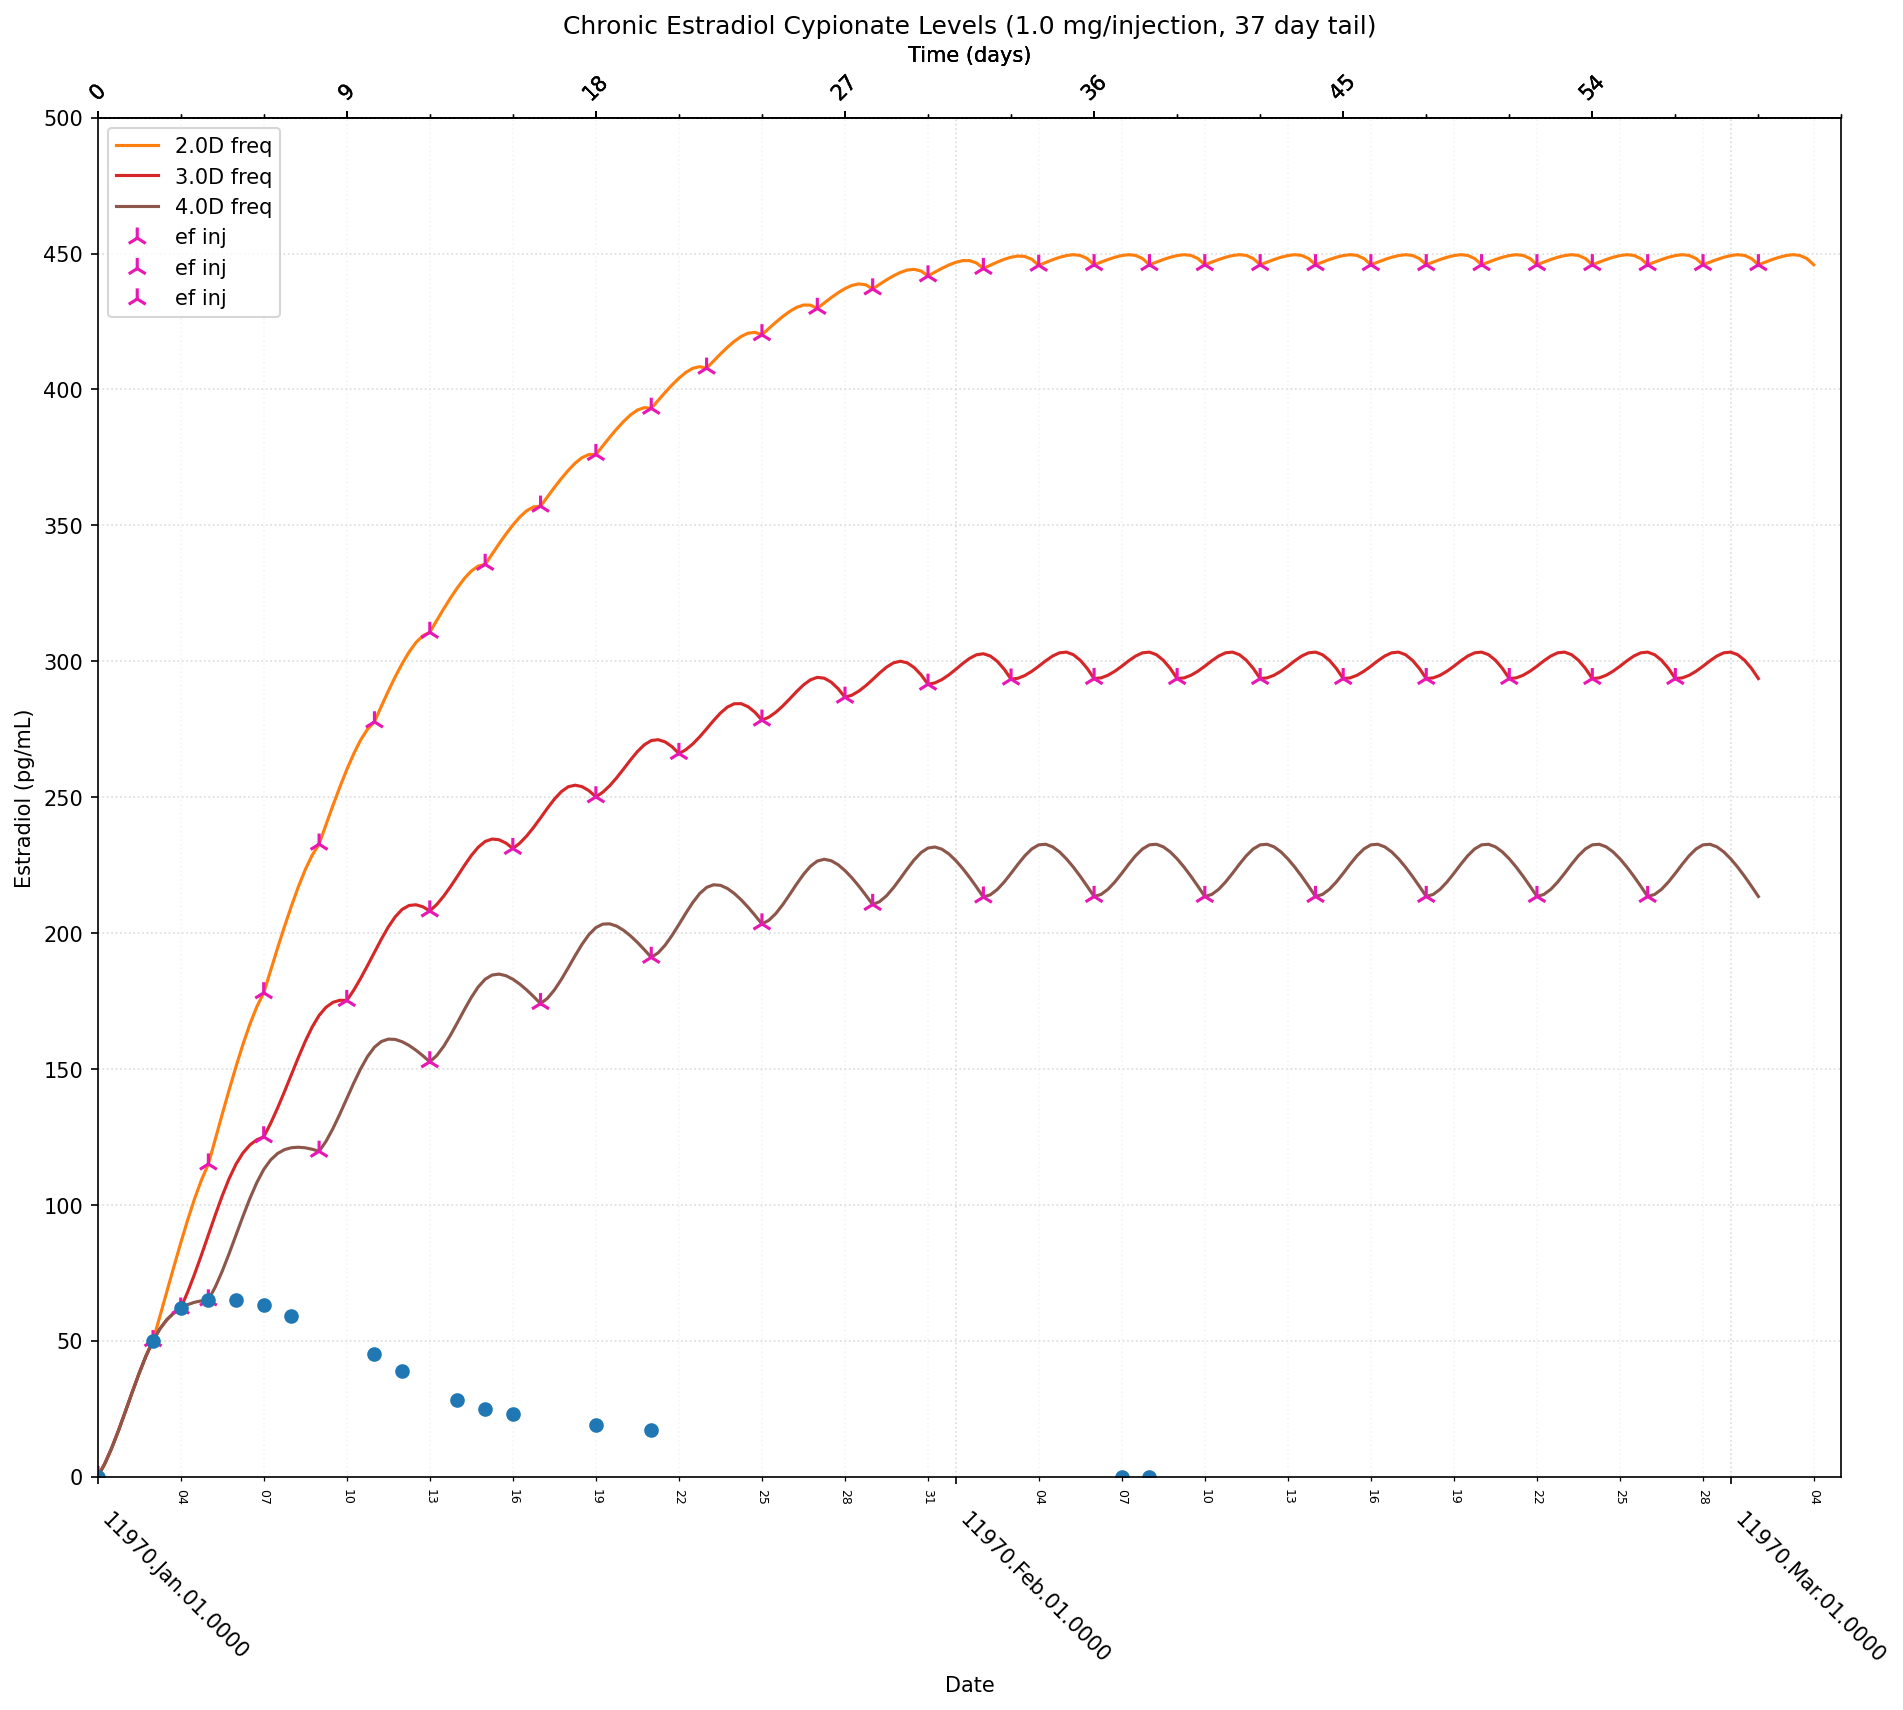

862.3055555555555
2139.514583333333
2388.2291666666665


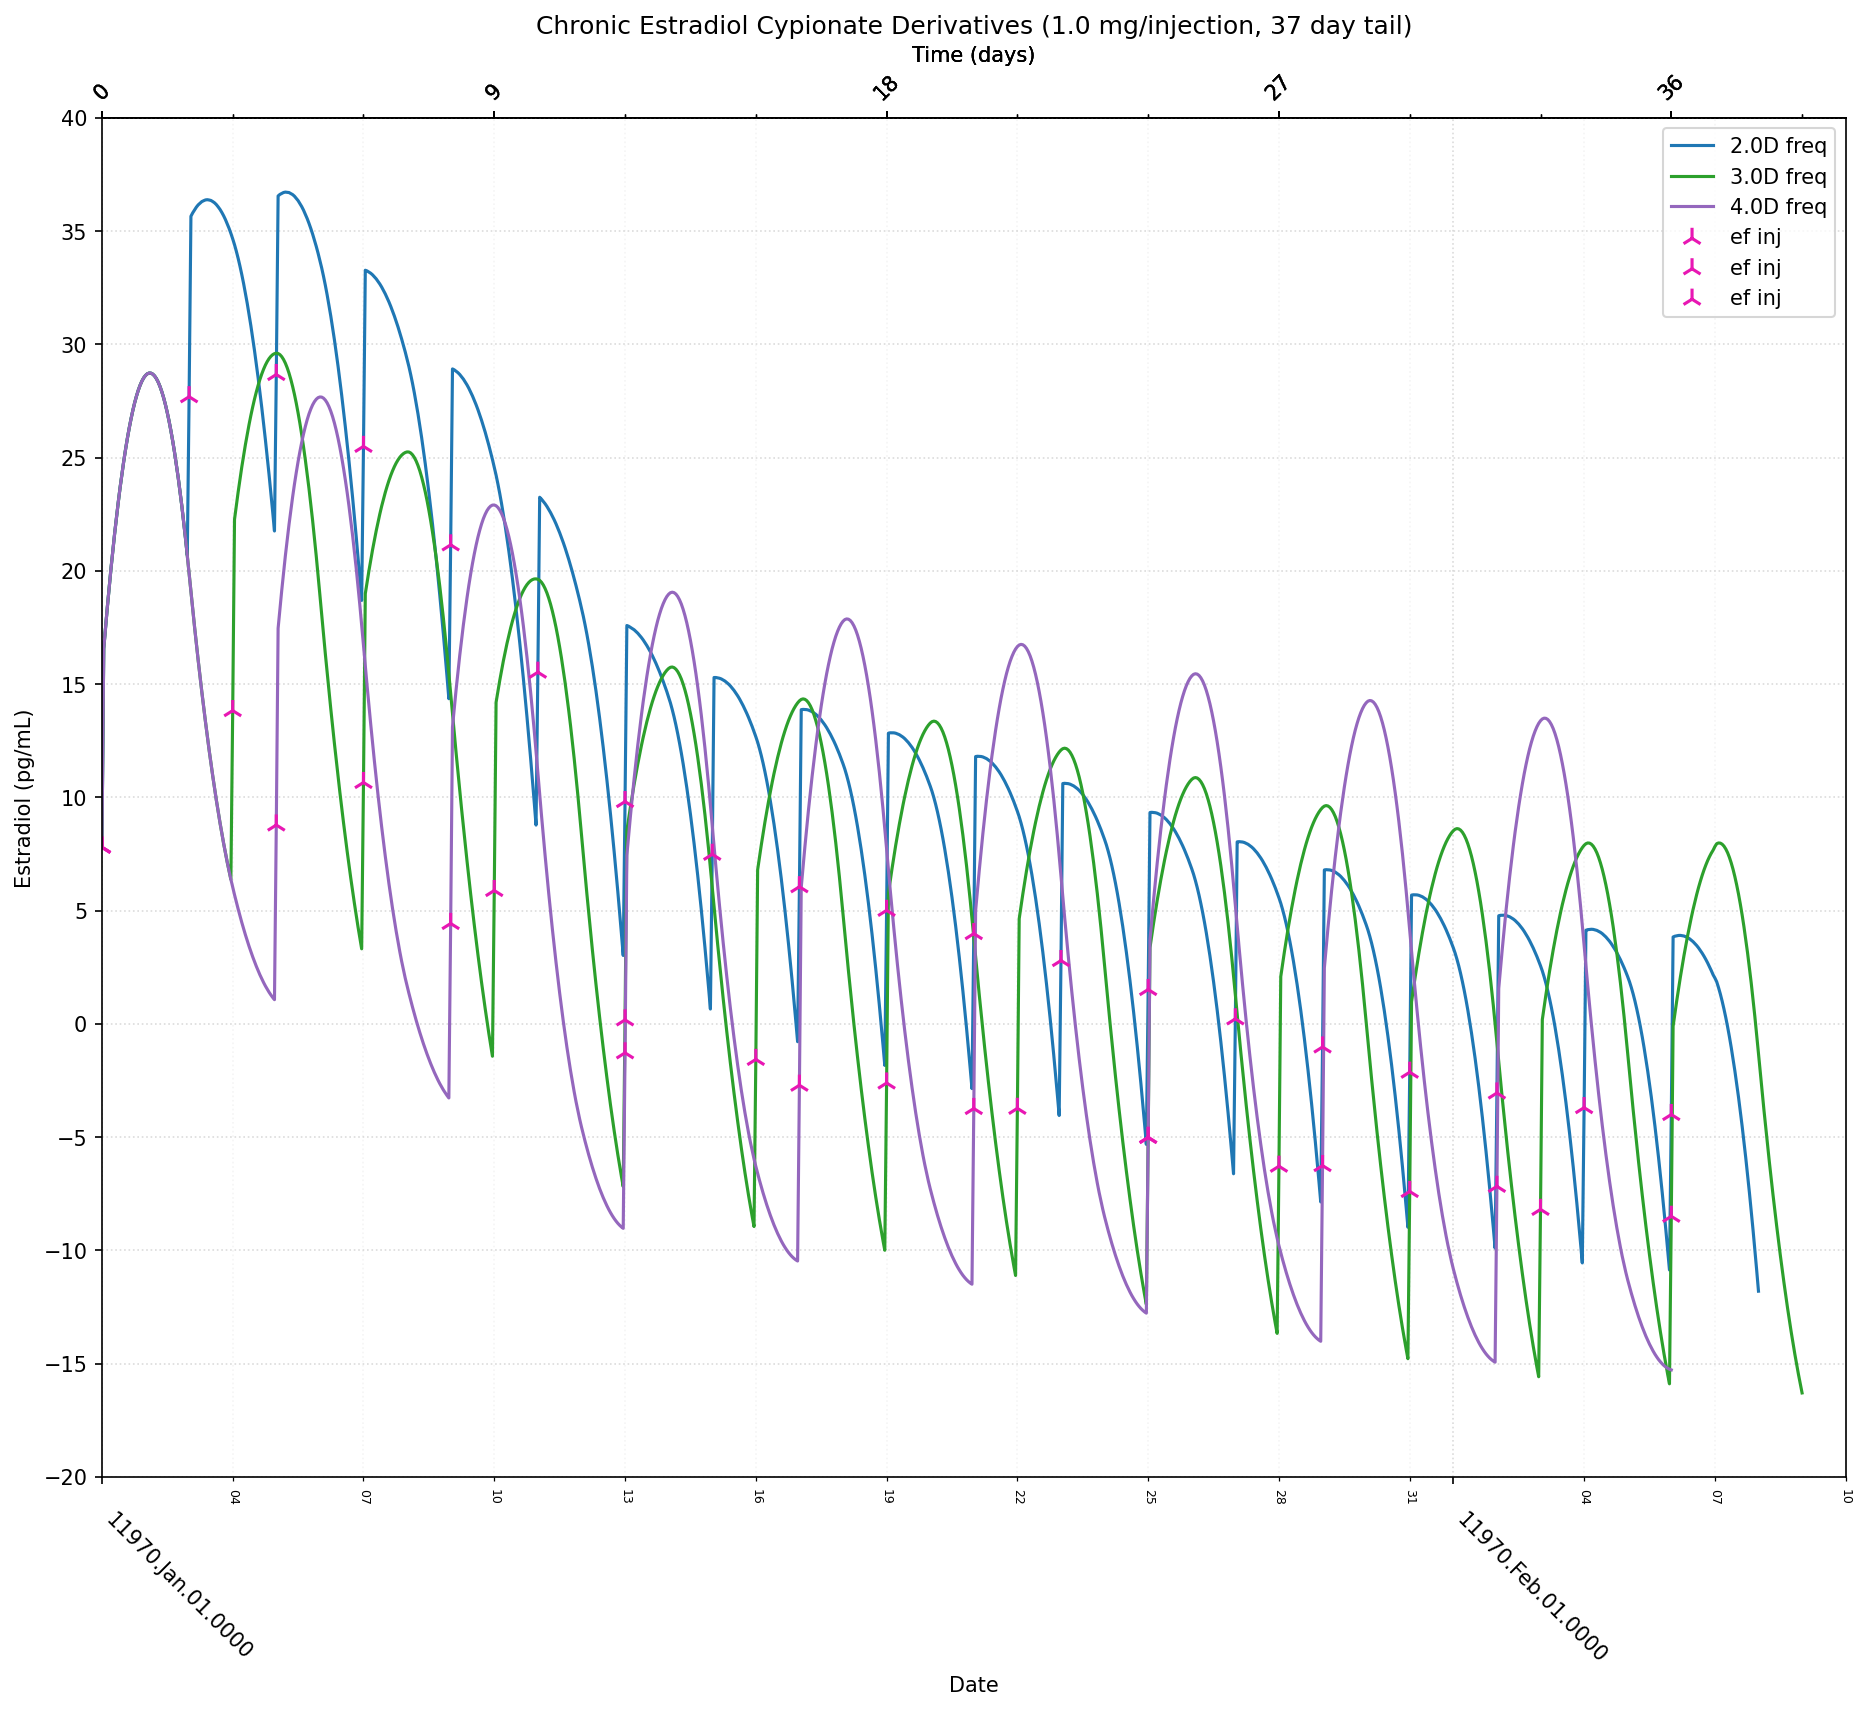

In [2]:
pharma.startPlot()
plt.title('Chronic Estradiol Cypionate Levels (1.0 mg/injection, 37 day tail)')
plt.ylim(bottom=0, top=500)
plt.yticks(range(0, 501, 50))
plt.plot(injectables.ec_level_1mg[:,0], injectables.ec_level_1mg[:,1], 'o')
pharma.plotInjectionFrequencies(
    injectables.ef_ec_1mg,
    sim_time=63.0,
    sim_freq='6H',
    inj_freqs=['2.0D', '3.0D', '4.0D'])

# Steady level ~= integral(inj_func) / inj_freq
from scipy.integrate import simps
print(simps(injectables.ec_level_1mg[:,1], x=injectables.ec_level_1mg[:,0]))
print(simps(injectables.ec_level_5mg[:,1], x=injectables.ec_level_5mg[:,0]))
print(simps(injectables.ev_level_5mg[:,1], x=injectables.ev_level_5mg[:,0]))

pharma.startPlot()
plt.title('Chronic Estradiol Cypionate Derivatives (1.0 mg/injection, 37 day tail)')
plt.ylim(bottom=-20, top=40)
plt.yticks(range(-20, 41, 5))
# The derivative of a sum is equal to the sum of the derivatives!
pharma.plotInjectionFrequencies(
    lambda T: derivative(injectables.ef_ec_1mg, T, dx=1e-6),
    sim_time=40.0,
    sim_freq='1H',
    inj_freqs=['2.0D', '3.0D', '4.0D'])

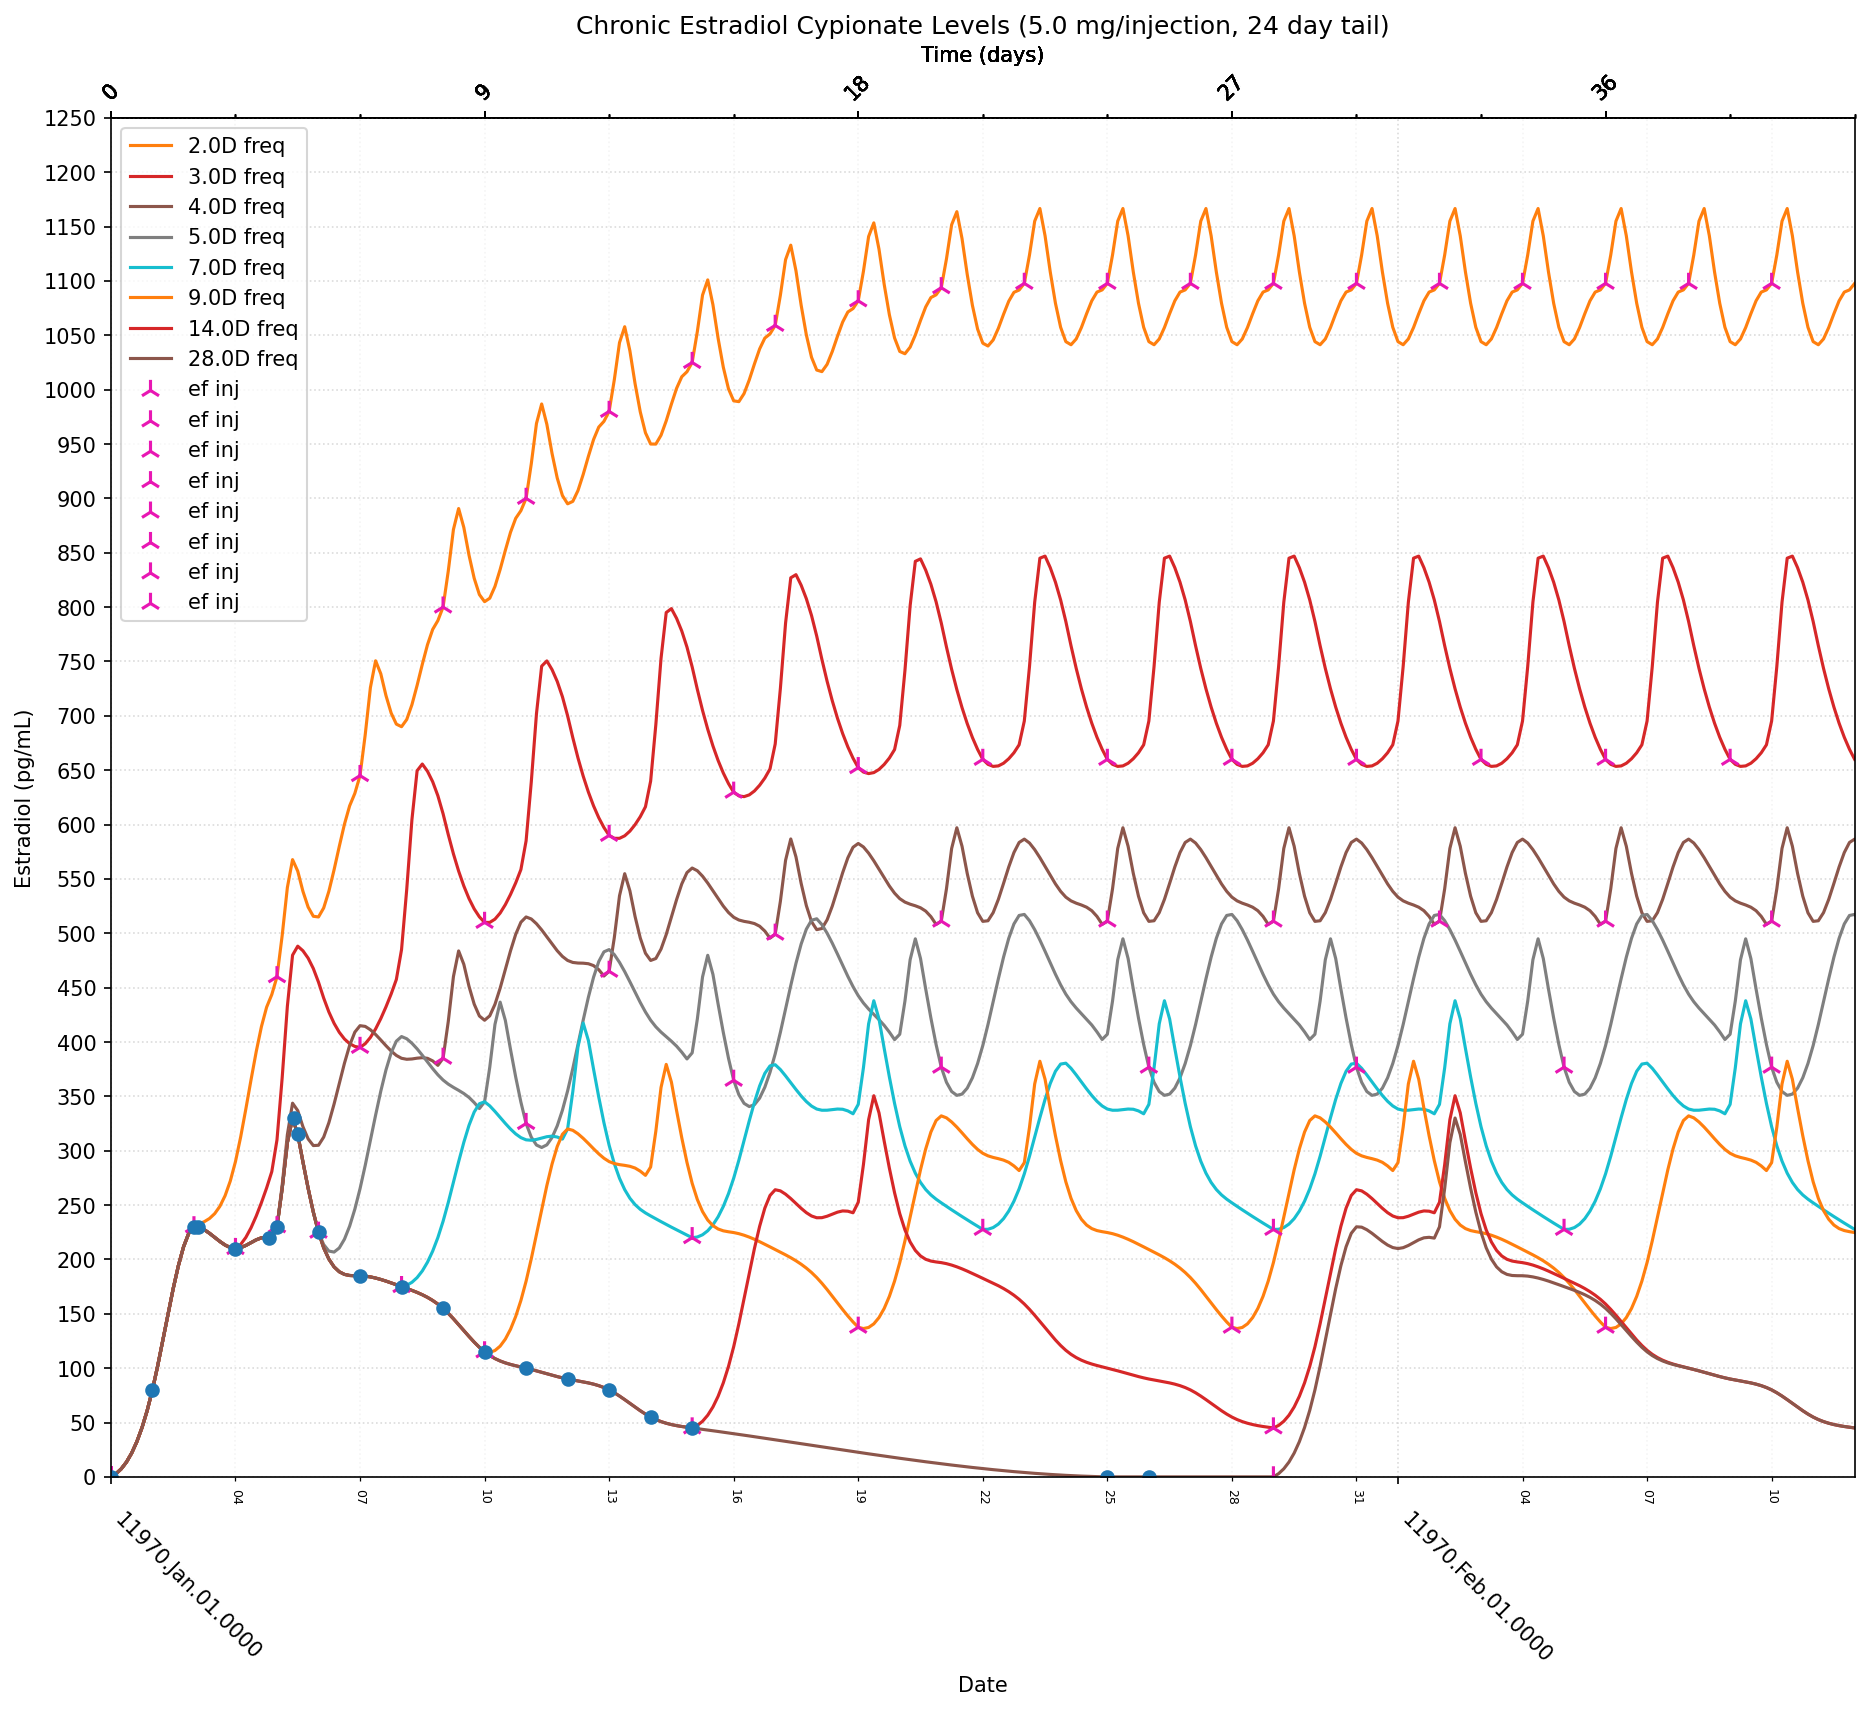

In [33]:
pharma.startPlot()
plt.title('Chronic Estradiol Cypionate Levels (5.0 mg/injection, 24 day tail)')
plt.ylim(bottom=0, top=1250)
plt.yticks(range(0, 1251, 50))
plt.plot(injectables.ec_level_5mg[:,0], injectables.ec_level_5mg[:,1], 'o')
pharma.plotInjectionFrequencies(
    injectables.ef_ec_5mg,
    sim_time=42.0,
    sim_freq='3H',
    inj_freqs=['2.0D', '3.0D', '4.0D', '5.0D', '7.0D', '9.0D', '14.0D', '28.0D'])

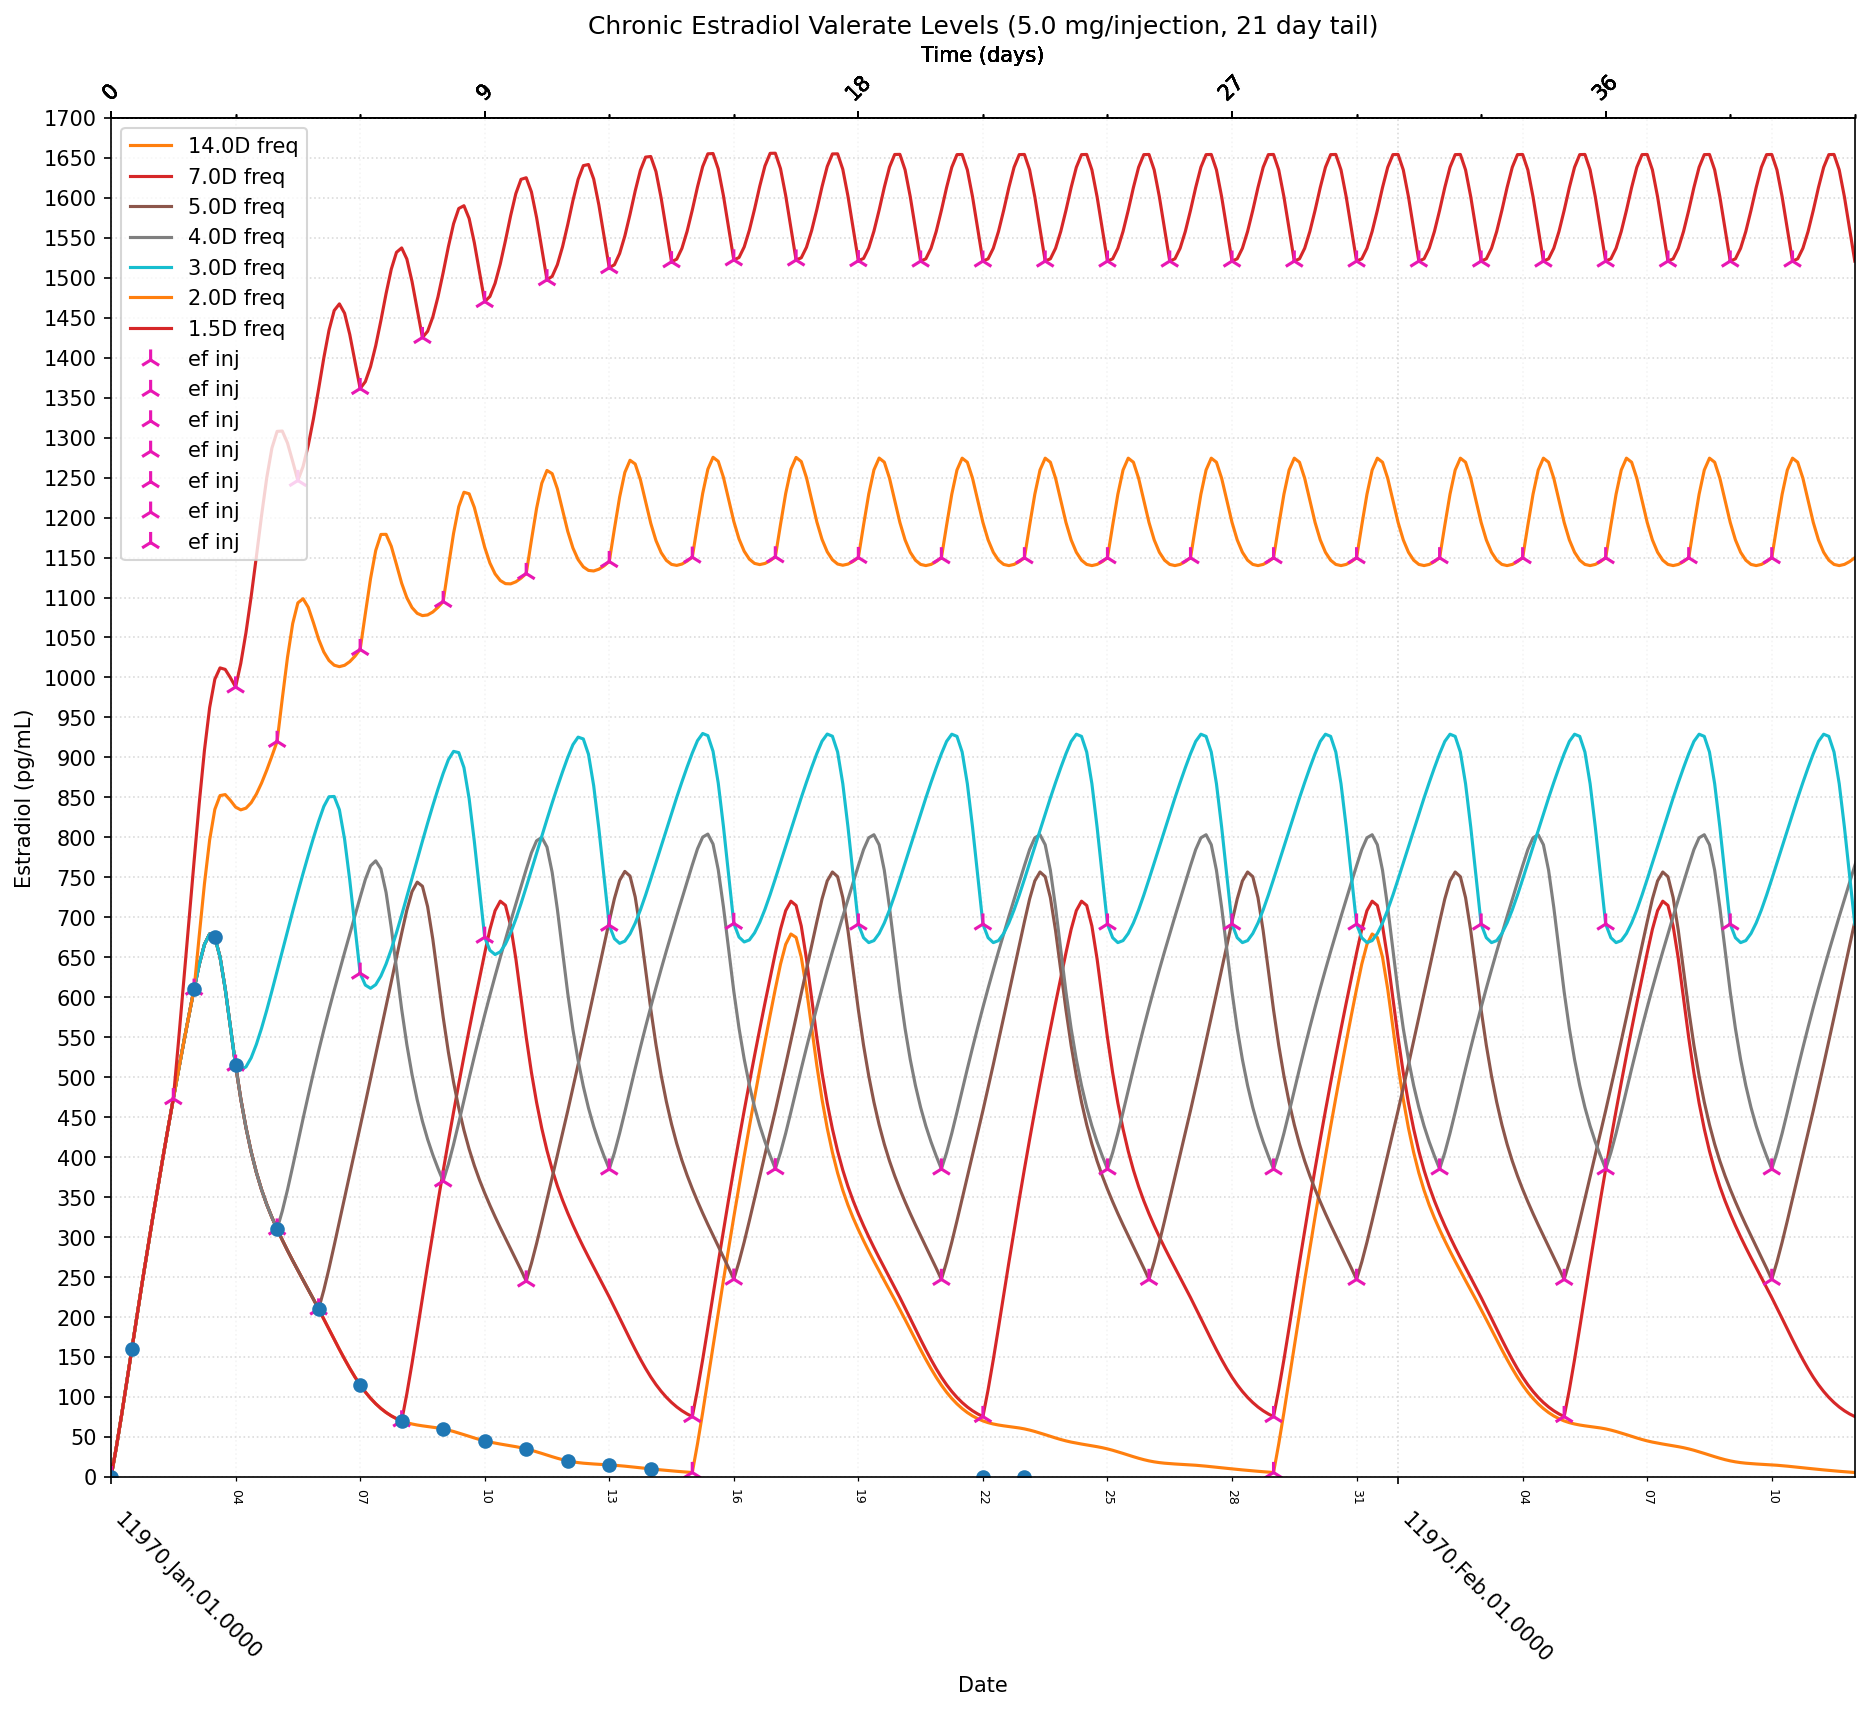

In [34]:
pharma.startPlot()
plt.title('Chronic Estradiol Valerate Levels (5.0 mg/injection, 21 day tail)')
plt.ylim(bottom=0, top=1700)
plt.yticks(range(0, 1701, 50))
plt.plot(injectables.ev_level_5mg[:,0], injectables.ev_level_5mg[:,1], 'o')
pharma.plotInjectionFrequencies(
    injectables.ef_ev_5mg,
    sim_time=42.0,
    sim_freq='3H',
    inj_freqs=['1.5D', '2.0D', '3.0D', '4.0D', '5.0D', '7.0D', '14.0D'][::-1])